In [87]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(20,15),"font.size":20,"axes.titlesize":20,"axes.labelsize":20})

from timeit import default_timer as timer
import math
from decimal import Decimal

from igraph import *

<h2>Helper functions:</h2>


In [88]:
#The wrapper time accepts callback functions with arguments (in tuple), performs callback and measures the time of execution.
#It returns tuple of callback result and time of callback execution.
def time(func,*args):
    start=timer()

    res=func(*args)

    end=timer()
    return (res,end-start)

In [89]:
#Function to generate a random adjacency matrix for a simple undirected weighted graph of 
#v vertices and e edges with assigned random positive integer weights.
def genAdj(v,e,deb=False):

    #Random connected (if possibble) graph based on the Erdos-Renyi model
    g=Graph.Erdos_Renyi(n=v,m=e)
    summary(g)

    #a graph plot if deb = true
    if(deb):
        layout = g.layout("kk")
        fig, ax = plt.subplots()
        plot(g, layout=layout, target=ax)

    #get non-weighted adj
    adj=np.array(g.get_adjacency().data)
    randomVV=np.random.randint(1,100,[v,v])
    #return wheighted adj by element-wise mul
    return np.multiply(randomVV,adj)

In [90]:
#Implementation of dijkstra's alg using adjacency matrix.
#from https://www.algorithms-and-technologies.com/dijkstra/python
def dijkstra(g, start):
    """
    :param graph: an adjacency-matrix-representation of the graph where (x,y) is the weight of the edge or 0 if there is no edge.
    :param start: the node to start from.
    :return: an array containing the shortest distances from the given start node to each other node
    """
    # This contains the distances from the start node to all other nodes
    distances = [float("inf") for _ in range(len(g))]
    # This contains whether a node was already visited
    visited = [False for _ in range(len(g))]
    # The distance from the start node to itself is of course 0
    distances[start] = 0
    # While there are nodes left to visit...
    while True:
        # ... find the node with the currently shortest distance from the start node...
        shortest_distance = float("inf")
        shortest_index = -1
        for i in range(len(g)):
            # ... by going through all nodes that haven't been visited yet
            if distances[i] < shortest_distance and not visited[i]:
                shortest_distance = distances[i]
                shortest_index = i

        if shortest_index == -1:
            # There was no node not yet visited --> We are done
            return distances

        # ...then, for all neighboring nodes that haven't been visited yet....
        for i in range(len(g[shortest_index])):
            # ...if the path over this edge is shorter...
            if g[shortest_index][i] != 0 and distances[i] > distances[shortest_index] + g[shortest_index][i]:
                # ...Save this path as new shortest path.
                distances[i] = distances[shortest_index] + g[shortest_index][i]

        # Lastly, note that we are finished with this node.
        visited[shortest_index] = True
        # print("Visited nodes: " + str(visited))
        # print("Currently lowest distances: " + str(distances))

In [91]:
#Implementation of Bellman-Ford alg for non-negative weights and w/o loops using adjacency matrix.
#from https://www.reddit.com/r/learnpython/comments/k351s7/is_it_possible_to_build_a_shortest_path_solution/
def BellmanFord(g, start):
    V=len(g)
    # Initialize distance of all vertices as infinite.
    dist = [np.Inf] * V
 
    # initialize distance of source as 0
    dist[start] = 0
 
    for _ in range(V-1):
        # Relax the edges, we need to go from every 'start'
        for u in range(V):
            # To every 'end'
            for v in range(len(g[u])):
                # And look at the weight
                w = g[u][v]
                if w != 0:
                    if dist[u] + w < dist[v]:
                        dist[v] = dist[u] + w
 
    return dist

IGRAPH U--- 100 500 -- 
[ 0 28  0  0  0  0  0 80  0  0  0  0  0  0  0  0  0  0  0 53  0  0  0  0
  0  0  0  0  0  0  0 64  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 15  0  0 95  0  0  0  0  0  0  0  0  0  0  0  0  0  0 93  0  0  0  0  0
  0  0  0  0  0  0  0 56 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0 23
  0  0  0 25]
[44  0  0  0  0  0 31  0  0  0  0  0  0  0  0  0  0  0  0  0  4  0  0 66
  0  0  0  0  0  0 54  0 57  0  0  0  0 52  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 10 33  0  0 65  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 66  4  0  0  0
  0 67  0  0]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 51  0  0  0  0 16 81  0  0
  0  0  0 62  0  9  0  0  0  0  0  0 81  0  0  0  0  0  0  0  0  0 60  0
  0 49  0  0  0  0  0  8  0  0  0 99  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0 16 60  0  0 27  0  0 75  0  0  0  0  0  0 85  0  0  0  0
  0  0  0  0]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 

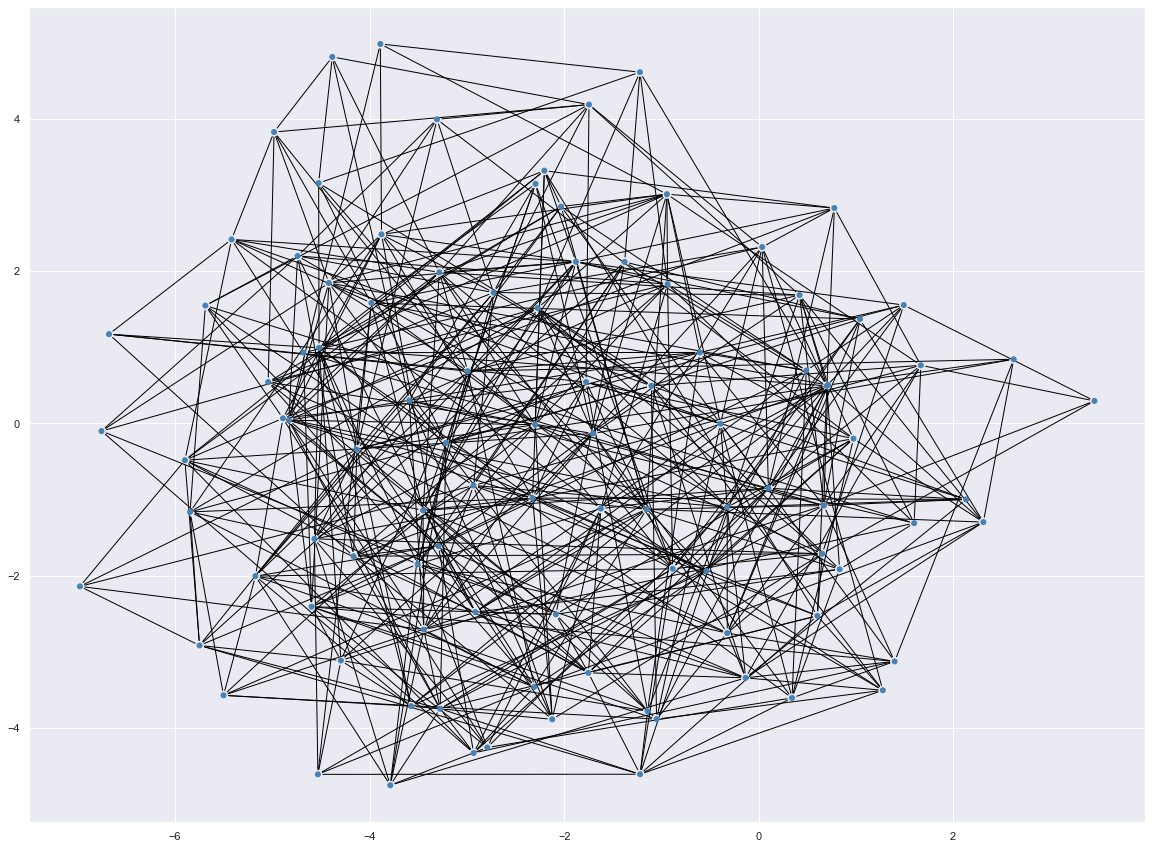

In [92]:
#debug cell, can be skipped
g=genAdj(100,500,True)
for i in range(0,100):
    print(g[i])

print("dijkstra: ",dijkstra(g,0))
print("BellmanFord: ", BellmanFord(g,0))


Final dataframe will include the next features:
* name - name of operation to investigate
* inpAdj - input adjacency matrix for debug
* inpStart - input starting vertex for debug
* res - result of operation for debug
* time_measured - execution time of operation in seconds

IGRAPH U--- 100 500 -- 


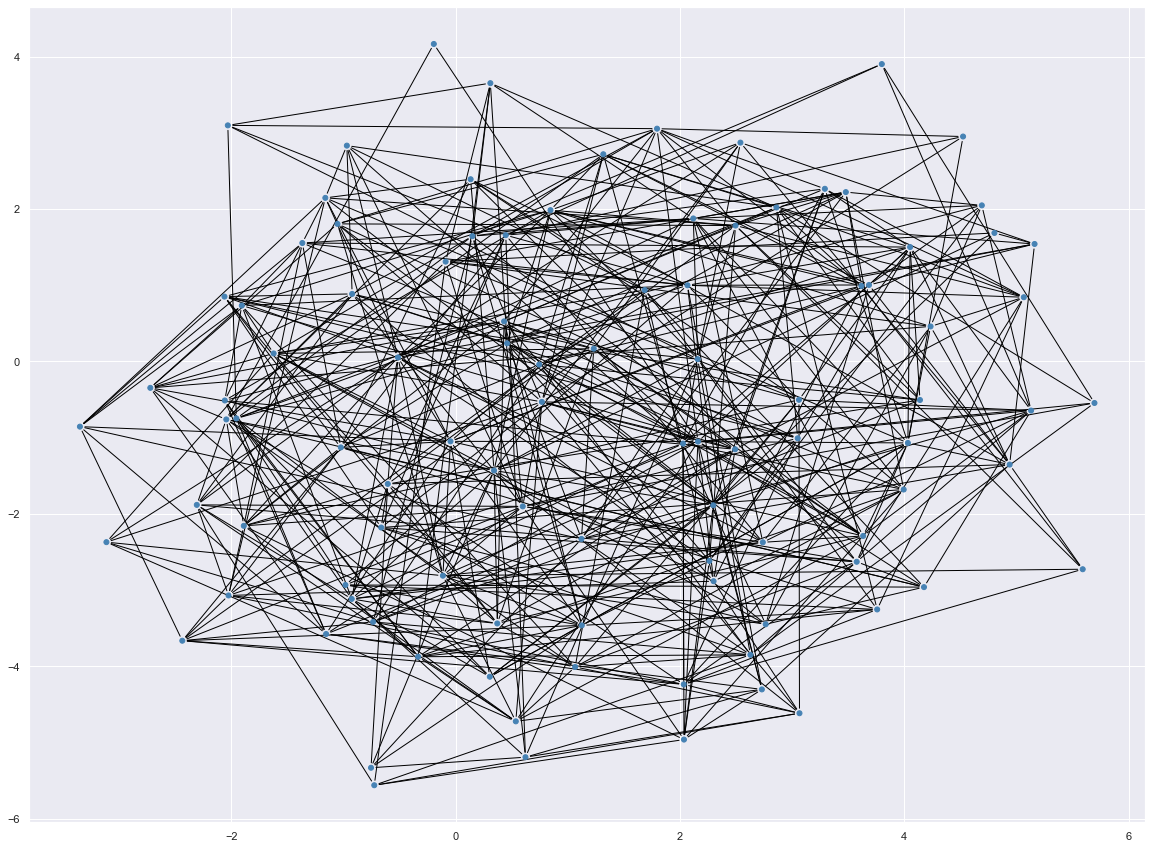

In [93]:
#if you already have computed csv, turn "useCsv" flag to True value and just skip code below in this cell
useCsv=False
V=100
E=500
if(not useCsv):
    #every data instance (a single measurment of execution time) will be added as a dictionary with
    #features listed above to list temp_data
    temp_data=[]

    #repeat every alg 10 times for single random graph and choosen vertex
    g=genAdj(V,E,True)
    st=np.random.randint(0,99)
    for i in range(10):
        #d
        res_time=time(dijkstra,g,st)
        temp_data.append({"name":"dijkstra","inpAdj":g,"inpStart":st,"res":res_time[0],"time_measured":res_time[1]})
        #bf
        res_time=time(BellmanFord,g,st)
        temp_data.append({"name":"bellmanFord","inpAdj":g,"inpStart":st,"res":res_time[0],"time_measured":res_time[1]})


In [94]:
df_final=pd.DataFrame()

if(useCsv):
    #write path to csv file instead of "df_final"
    df_final=pd.read_csv("DAndBF.csv",index_col=0)
else:
    #Convert the list of dictionaries to dataframe:
    df_final = pd.DataFrame.from_dict(temp_data)
    #df_final.to_csv("DAndBF.csv")

df_final

,name,inpAdj,inpStart,res,time_measured
0,dijkstra,"[[0, 0, 95, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0...",76,"[65, 67, 50, 40, 70, 57, 63, 70, 27, 59, 64, 4...",0.020801
1,bellmanFord,"[[0, 0, 95, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0...",76,"[65, 67, 50, 40, 70, 57, 63, 70, 27, 59, 64, 4...",0.777378
2,dijkstra,"[[0, 0, 95, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0...",76,"[65, 67, 50, 40, 70, 57, 63, 70, 27, 59, 64, 4...",0.019256
3,bellmanFord,"[[0, 0, 95, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0...",76,"[65, 67, 50, 40, 70, 57, 63, 70, 27, 59, 64, 4...",0.749634
4,dijkstra,"[[0, 0, 95, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0...",76,"[65, 67, 50, 40, 70, 57, 63, 70, 27, 59, 64, 4...",0.016943
5,bellmanFord,"[[0, 0, 95, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0...",76,"[65, 67, 50, 40, 70, 57, 63, 70, 27, 59, 64, 4...",0.762241
6,dijkstra,"[[0, 0, 95, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0...",76,"[65, 67, 50, 40, 70, 57, 63, 70, 27, 59, 64, 4...",0.014263
7,bellmanFord,"[[0, 0, 95, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0...",76,"[65, 67, 50, 40, 70, 57, 63, 70, 27, 59, 64, 4...",0.862896
8,dijkstra,"[[0, 0, 95, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0...",76,"[65, 67, 50, 40, 70, 57, 63, 70, 27, 59, 64, 4...",0.009107
9,bellmanFord,"[[0, 0, 95, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0...",76,"[65, 67, 50, 40, 70, 57, 63, 70, 27, 59, 64, 4...",0.765866


In [95]:
#find average for every combination of n number and operation name:
procesed=df_final.groupby(["name"],axis=0).aggregate({"time_measured":[np.mean,np.min,np.max]}).reset_index()
procesed

name time_measured                    
                        mean      amin      amax
0  bellmanFord      0.784810  0.696799  0.867172
1     dijkstra      0.015166  0.009107  0.020801

In [96]:
#Implementation of a-star alg.
#We can move vertically and horizontally, but not diagonally.
#Heuristic is just eucledian distance from start point to end point.
#from https://github.com/BaijayantaRoy/Medium-Article/blob/master/A_Star.ipynb
class Node:
    def __init__(self, parent=None, position=None):
        self.parent = parent
        self.position = position

        self.g = 0
        self.h = 0
        self.f = 0
    def __eq__(self, other):
        return self.position == other.position

#This function return the path of the search
def return_path(current_node,maze):
    path = []
    no_rows, no_columns = np.shape(maze)
    # here we create the initialized result maze with -1 in every position
    result = [[-1 for i in range(no_columns)] for j in range(no_rows)]
    current = current_node
    while current is not None:
        path.append(current.position)
        current = current.parent
    # Return reversed path as we need to show from start to end path
    path = path[::-1]
    start_value = 0
    # we update the path of start to end found by A-star search with every step incremented by 1
    for i in range(len(path)):
        result[path[i][0]][path[i][1]] = start_value
        start_value += 1
    return result


def aStar(maze, cost, start, end):
    """
        Returns a list of tuples as a path from the given start to the given end in the given maze
        :param maze:
        :param cost
        :param start:
        :param end:
        :return:
    """

    # Create start and end node with initized values for g, h and f
    start_node = Node(None, tuple(start))
    start_node.g = start_node.h = start_node.f = 0
    end_node = Node(None, tuple(end))
    end_node.g = end_node.h = end_node.f = 0

    # Initialize both yet_to_visit and visited list
    # in this list we will put all node that are yet_to_visit for exploration. 
    # From here we will find the lowest cost node to expand next
    yet_to_visit_list = []  
    # in this list we will put all node those already explored so that we don't explore it again
    visited_list = [] 
    
    # Add the start node
    yet_to_visit_list.append(start_node)
    
    # Adding a stop condition. This is to avoid any infinite loop and stop 
    # execution after some reasonable number of steps
    outer_iterations = 0
    max_iterations = (len(maze) // 2) ** 10

    # what squares do we search . serarch movement is left-right-top-bottom 
    #(4 movements) from every positon
    #w/o diagonal moves
    move  =  [[-1, 0 ], # go up
              [ 0, -1], # go left
              [ 1, 0 ], # go down
              [ 0, 1 ]] # go right

    #find maze has got how many rows and columns 
    no_rows, no_columns = np.shape(maze)
    
    # Loop until you find the end
    
    while len(yet_to_visit_list) > 0:
        
        # Every time any node is referred from yet_to_visit list, counter of limit operation incremented
        outer_iterations += 1    

        
        # Get the current node
        current_node = yet_to_visit_list[0]
        current_index = 0
        for index, item in enumerate(yet_to_visit_list):
            if item.f < current_node.f:
                current_node = item
                current_index = index
                
        # if we hit this point return the path such as it may be no solution or 
        # computation cost is too high
        if outer_iterations > max_iterations:
            print ("giving up on pathfinding too many iterations")
            return return_path(current_node,maze)

        # Pop current node out off yet_to_visit list, add to visited list
        yet_to_visit_list.pop(current_index)
        visited_list.append(current_node)

        # test if goal is reached or not, if yes then return the path
        if current_node == end_node:
            return return_path(current_node,maze)

        # Generate children from all adjacent squares
        children = []

        for new_position in move: 

            # Get node position
            node_position = (current_node.position[0] + new_position[0], current_node.position[1] + new_position[1])

            # Make sure within range (check if within maze boundary)
            if (node_position[0] > (no_rows - 1) or 
                node_position[0] < 0 or 
                node_position[1] > (no_columns -1) or 
                node_position[1] < 0):
                continue

            # Make sure walkable terrain
            if maze[node_position[0]][node_position[1]] != 0:
                continue

            # Create new node
            new_node = Node(current_node, node_position)

            # Append
            children.append(new_node)

        # Loop through children
        for child in children:
            
            # Child is on the visited list (search entire visited list)
            if len([visited_child for visited_child in visited_list if visited_child == child]) > 0:
                continue

            # Create the f, g, and h values
            child.g = current_node.g + cost
            ## Heuristic costs calculated here, this is using eucledian distance
            child.h = (((child.position[0] - end_node.position[0]) ** 2) + 
                       ((child.position[1] - end_node.position[1]) ** 2)) 

            child.f = child.g + child.h

            # Child is already in the yet_to_visit list and g cost is already lower
            if len([i for i in yet_to_visit_list if child == i and child.g > i.g]) > 0:
                continue

            # Add the child to the yet_to_visit list
            yet_to_visit_list.append(child)


In [97]:
def genMaze(N,M,obst):
    #We will generate maze with zeros and ones, zeros are empty cell and ones are obstacles
    maze=np.zeros(N*M, dtype=int)
    obstacles=np.random.choice(N*M,40,replace=False)
    maze[obstacles]=1

    maze=maze.reshape([N,M])
    return (maze,obstacles)

In [100]:
N=10
M=20
obst=40
costs=1

maze=[]
obstCoords=[]

#if you already have computed csv, turn "useCsv" flag to True value and just skip code below in this cell
useCsv=False
if(not useCsv):
    #every data instance (a single measurment of execution time) will be added as a dictionary with
    #features listed above to list temp_data
    temp_data=[]

    #repeat a* alg 5 times for single random maze and different random positions of cells
    mazeTuple=genMaze(N,M,obst)
    maze=mazeTuple[0]
    obstCoords=mazeTuple[1]
    #empty tiles
    spaces=np.array(range(0,N*M-1))
    spaces=[x for x in spaces if x not in obstCoords]

    print(maze)
    for i in range(5):
        #choose point
        start=np.random.choice(spaces,1)[0]
        #and convert it to N,M form
        start=[int(np.floor(start/M)),int(start%M)]

        #choose point
        end=np.random.choice(spaces,1)[0]
        #and convert it to N,M form
        end=[int(np.floor(end/M)),int(end%M)]

        #a*
        res_time=time(aStar,maze,costs,start,end)
        temp_data.append({"name":"a*","inpMaze":maze,"inpStart":start,"inpEnd":end,"res":res_time[0],"time_measured":res_time[1]})

[[0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0]
 [1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 1 0 1 0 1]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1]]


In [101]:
df_final=pd.DataFrame()

if(useCsv):
    #write path to csv file instead of "df_final"
    df_final=pd.read_csv("aStar.csv",index_col=0)
else:
    #Convert the list of dictionaries to dataframe:
    df_final = pd.DataFrame.from_dict(temp_data)
    df_final.to_csv("aStar.csv")

df_final

,name,inpMaze,inpStart,inpEnd,res,time_measured
0,a*,"[[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,...","[5, 1]","[6, 17]","[[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, ...",0.002908
1,a*,"[[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,...","[7, 12]","[7, 17]","[[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, ...",0.000396
2,a*,"[[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,...","[6, 17]","[9, 3]","[[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, ...",0.001850
3,a*,"[[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,...","[0, 6]","[3, 12]","[[-1, -1, -1, -1, -1, -1, 0, 1, 2, 3, -1, -1, ...",0.001059
4,a*,"[[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,...","[5, 16]","[8, 5]",None,0.000107


We will make heatmap plots to analyze every path:

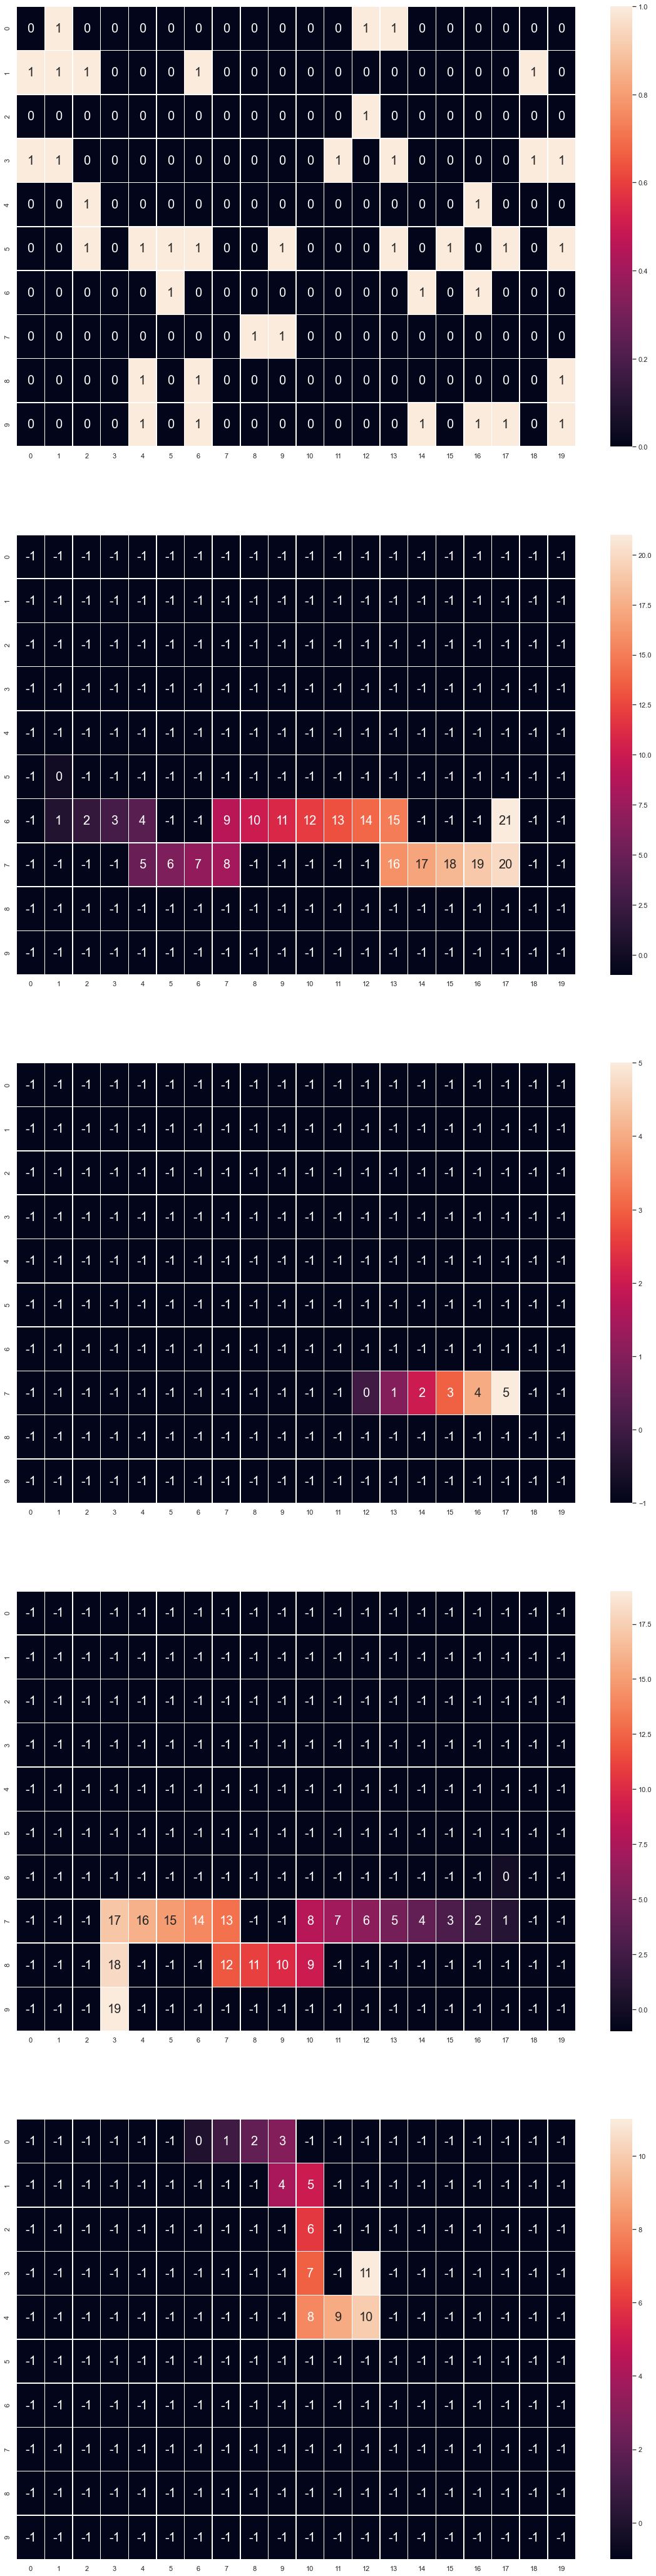

In [119]:
sns.set(rc={'figure.figsize':(20,15*5),"font.size":20,"axes.titlesize":20,"axes.labelsize":20})

f,axes=plt.subplots(nrows=5)
sns.heatmap(maze,annot=True, fmt="d", linewidths=.5,ax=axes[0])

for i in range(5):
    if(df_final.iloc[i,:].res is not None):
        sns.heatmap(df_final.iloc[i,:].res,annot=True, fmt="d", linewidths=.5,ax=axes[i+1])
        
sns.set(rc={'figure.figsize':(20,15),"font.size":20,"axes.titlesize":20,"axes.labelsize":20})

So, as you can see end point for the last iteration was unreachable.

To make plots even more clear add obstacles as 25 numbers (actually, it could be any number).

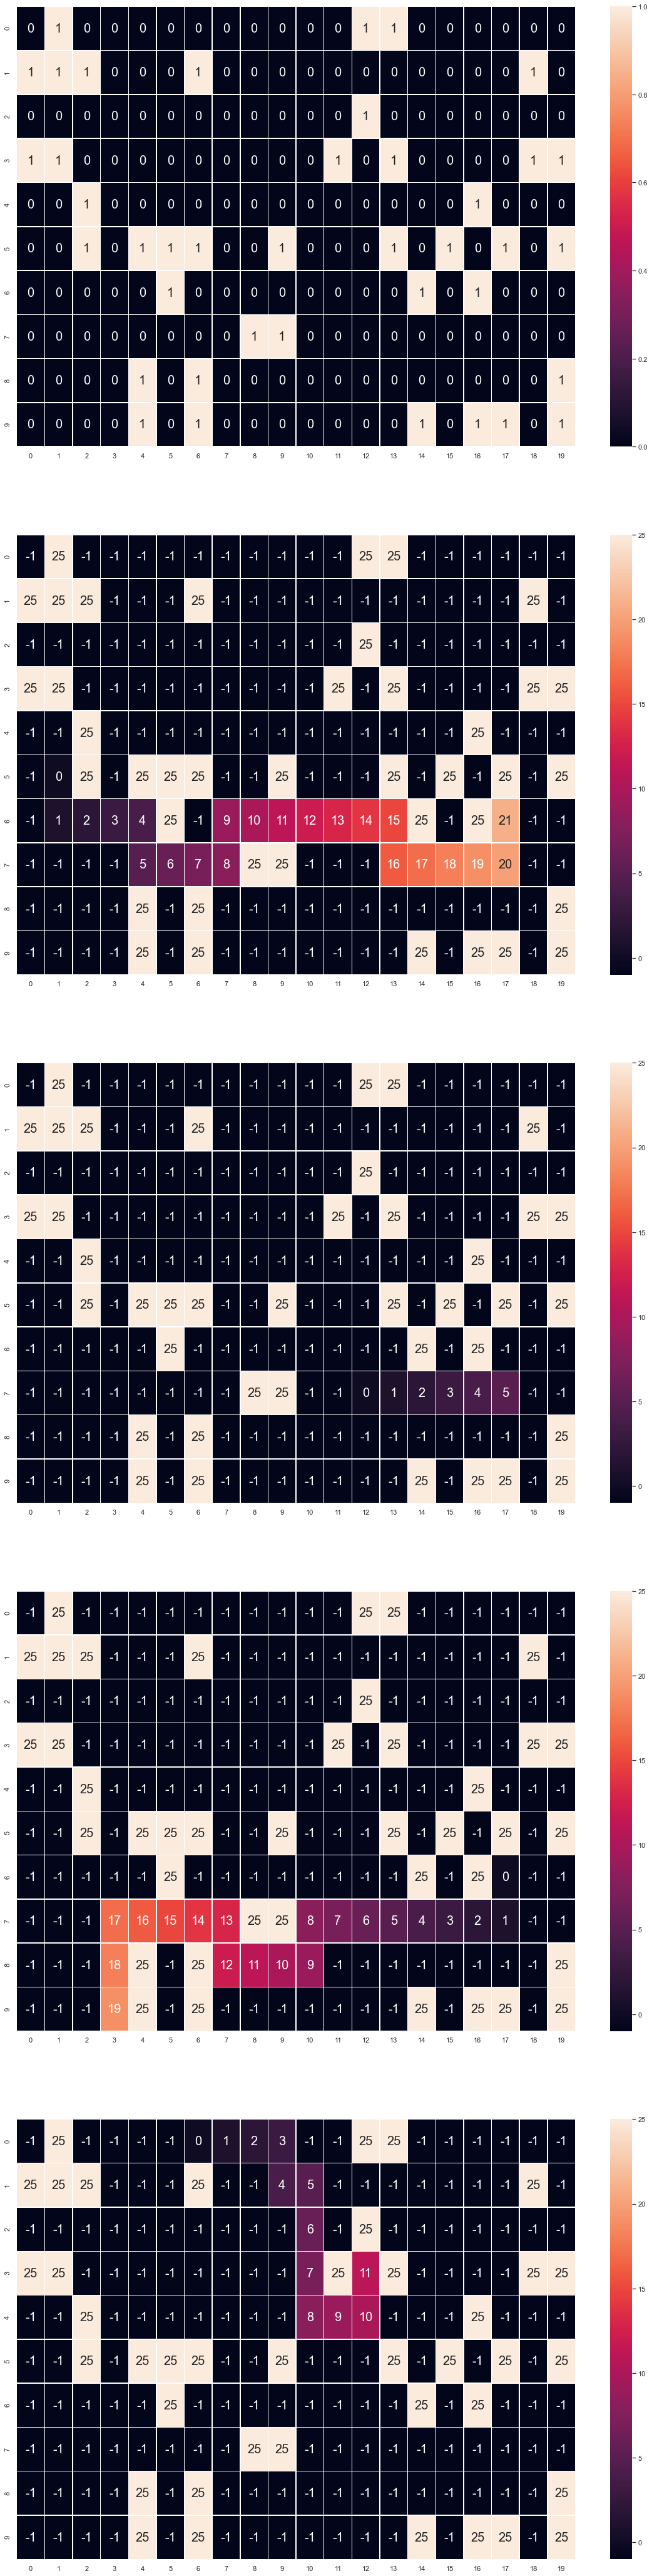

In [122]:
sns.set(rc={'figure.figsize':(20,15*5),"font.size":20,"axes.titlesize":20,"axes.labelsize":20})

f,axes=plt.subplots(nrows=5)
sns.heatmap(maze,annot=True, fmt="d", linewidths=.5,ax=axes[0])

for i in range(5):
    if(df_final.iloc[i,:].res is not None):
        sns.heatmap(df_final.iloc[i,:].res+maze*(26),annot=True, fmt="d", linewidths=.5,ax=axes[i+1])
        
sns.set(rc={'figure.figsize':(20,15),"font.size":20,"axes.titlesize":20,"axes.labelsize":20})